
# Question 3:

### imports:

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np
import random
import math
from itertools import combinations
import networkx as nx

In [2]:
# %matplotlib qt5
# %matplotlib inline

### The Data:

In [3]:
data = pd.read_csv("normalized_unoversampled_clean_data_red.csv")
# data.head()  

In [4]:
X = data.drop(["quality"], axis=1)
Y = data["quality"]

# 3A- Exploring the learning ease of each attribute

## Combination class:

In [5]:
class Combination:
    def __init__(self, att_comb, rmse):
        self.att_comb = att_comb
        self.rmse = rmse
    
    def get_att_comb(self):
        return self.att_comb
    
    def get_rmse(self):
        return self.rmse
    
    def get_number_of_atributes(self):
        return len(self.att_comb)

## Auxiliary functions:

In [6]:
def calc_lin_reg_rmse(X, combination, attribute_df) -> float:
    X_train, X_test, attribute_train, attribute_test = train_test_split(X[[col for col in combination]],
                                                                        attribute_df, test_size=0.18, random_state=42)
    reg = LinearRegression().fit(X_train, attribute_train)
    attribute_pred = reg.predict(X_test)
    
    return mean_squared_error(attribute_test, attribute_pred) ** 0.5

In [7]:
def open_tuple_with_dict(dictionary, tup):
    vals_list = [dictionary[i] for i in tup]
    return tuple(vals_list)

## Linear regresion RMSE of attribute,
## depending on the number of attributes used in the learning process:

In [8]:
attribute_combinations_list = []
for attribute in X.columns.tolist():
    attribute_df = X[attribute]
    current_X = X.drop([attribute], axis=1)
    attributes = X.columns.tolist()
    attributes.remove(attribute)
    attributes_dict = {}
    for i in range(10):
        attributes_dict[i] = attributes[i]
    current_X.columns = range(10)
    combinations_list = []
    for i in range(10):
        min_rmse = float('inf')
        min_combination = ()
        for combination in combinations(range(10), i + 1):
            lin_reg_calc = calc_lin_reg_rmse(current_X, combination, attribute_df)
            if lin_reg_calc < min_rmse:
                min_rmse = lin_reg_calc
                min_combination = combination
        min_combination = open_tuple_with_dict(attributes_dict, min_combination)
        combinations_list.append(Combination(min_combination, min_rmse))
    attribute_combinations_list.append((attribute, combinations_list))

# Learning the quality:

In [9]:
    attribute = 'quality'
    attribute_df = Y.copy()
    current_X = X.copy()
    attributes = X.columns.tolist()
    attributes_dict = {}
    for i in range(11):
        attributes_dict[i] = attributes[i]
    current_X.columns = range(11)
    combinations_list = []
    for i in range(11):
        min_rmse = float('inf')
        min_combination = ()
        for combination in combinations(range(11), i + 1):
            lin_reg_calc = calc_lin_reg_rmse(current_X, combination, attribute_df)
            if lin_reg_calc < min_rmse:
                min_rmse = lin_reg_calc
                min_combination = combination
        min_combination = open_tuple_with_dict(attributes_dict, min_combination)
        combinations_list.append(Combination(min_combination, min_rmse))
    attribute_combinations_list.append((attribute, combinations_list))

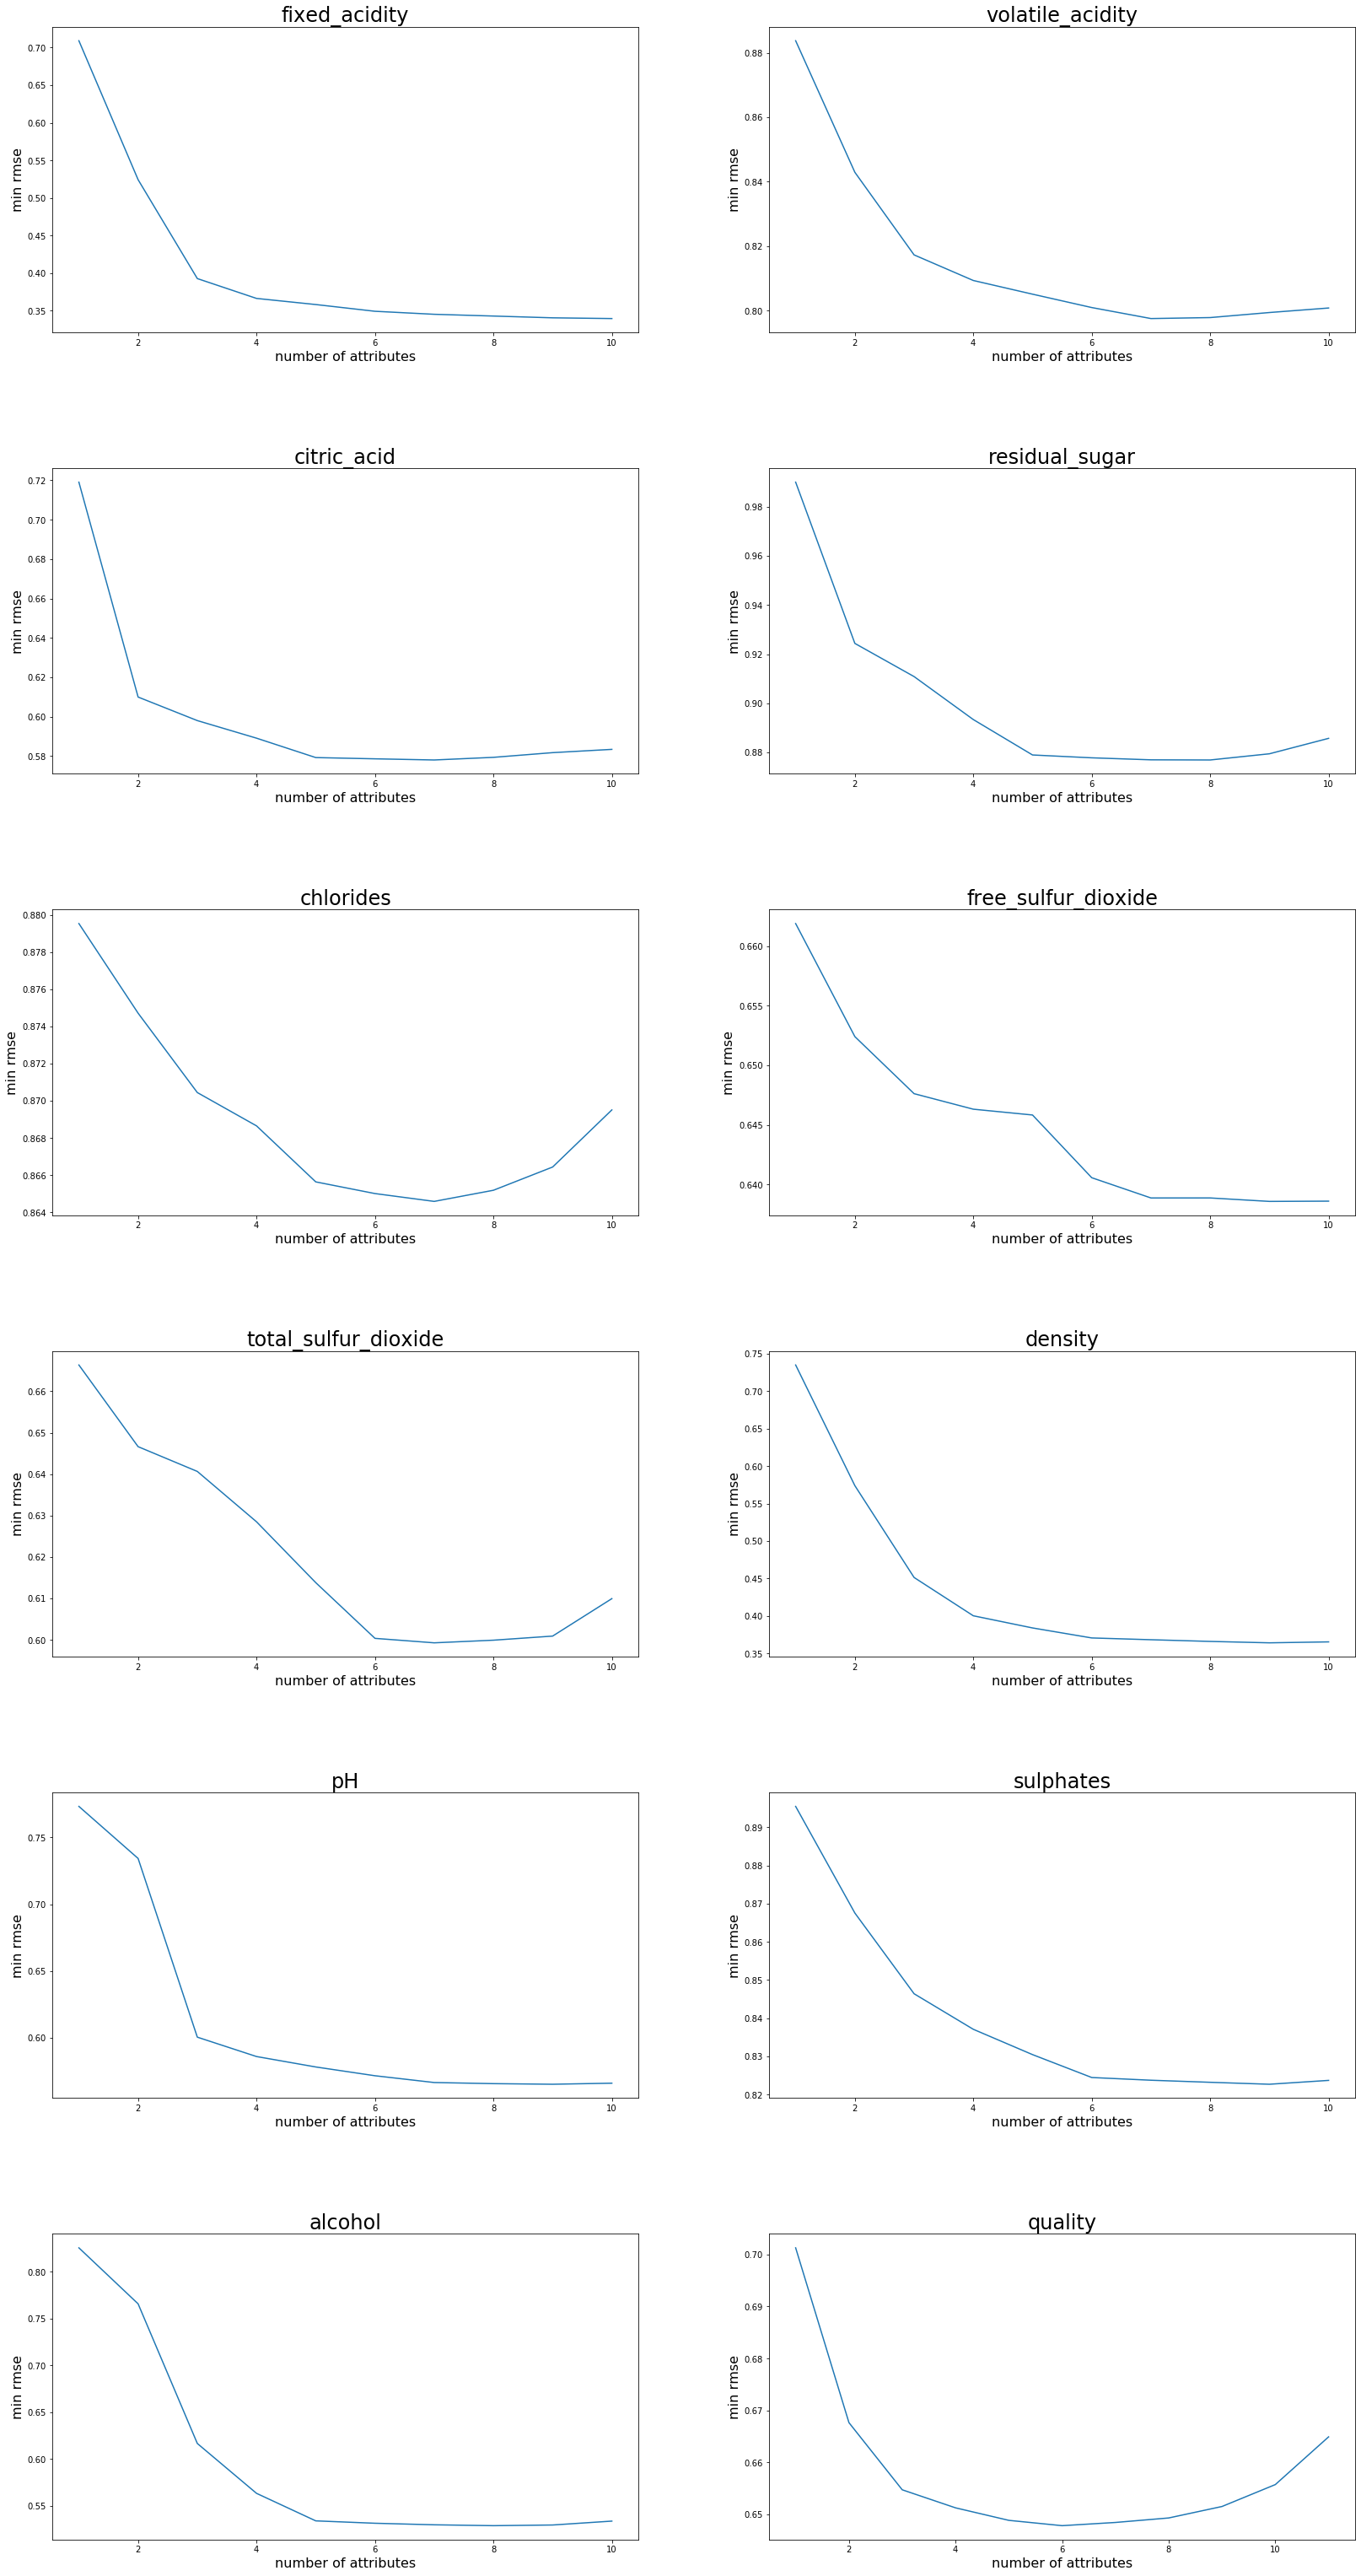

In [11]:
%matplotlib inline
fig, axs = plt.subplots(6, 2, figsize=(25, 45))
for attribute in range(len(X.columns.tolist())):
    xs = [i + 1 for i in range(10)]
    ys = [comb.get_rmse() for comb in attribute_combinations_list[attribute][1]]
    axs[int(attribute / 2), int(attribute % 2)].set_xlabel('number of attributes', fontsize=16)
    axs[int(attribute / 2), int(attribute % 2)].set_ylabel('min rmse', fontsize=16)
#     axs[int(attribute / 2), int(attribute % 2)].axhline(0, lw=0.5, color='black')
#     axs[int(attribute / 2), int(attribute % 2)].axvline(0, lw=0.5, color='black')
    axs[int(attribute / 2), int(attribute % 2)].set_title(attribute_combinations_list[attribute][0], fontsize=24)
    axs[int(attribute / 2), int(attribute % 2)].plot(xs, ys)
# quality:
attribute = 11
xs = [i + 1 for i in range(11)]
ys = [comb.get_rmse() for comb in attribute_combinations_list[attribute][1]]
axs[int(attribute / 2), int(attribute % 2)].set_xlabel('number of attributes', fontsize=16)
axs[int(attribute / 2), int(attribute % 2)].set_ylabel('min rmse', fontsize=16)
#     axs[int(attribute / 2), int(attribute % 2)].axhline(0, lw=0.5, color='black')
#     axs[int(attribute / 2), int(attribute % 2)].axvline(0, lw=0.5, color='black')
axs[int(attribute / 2), int(attribute % 2)].set_title(attribute_combinations_list[attribute][0], fontsize=24)
axs[int(attribute / 2), int(attribute % 2)].plot(xs, ys)
##
fig.tight_layout(pad=10.0)

In [14]:
i = 11
print('for ' + data.columns.tolist()[i] + ':')
for comb in attribute_combinations_list[i][1]:
    print('    for ' + str(comb.get_number_of_atributes()) + ' attributes combination: ')
    print('    the min rmse is: ' + str(comb.get_rmse()) + ', with the combination: ')
    print('    ' + str(comb.get_att_comb()))

for quality:
    for 1 attributes combination: 
    the min rmse is: 0.7012899272395177, with the combination: 
    ('alcohol',)
    for 2 attributes combination: 
    the min rmse is: 0.6676520170773259, with the combination: 
    ('sulphates', 'alcohol')
    for 3 attributes combination: 
    the min rmse is: 0.6547269551782161, with the combination: 
    ('volatile_acidity', 'sulphates', 'alcohol')
    for 4 attributes combination: 
    the min rmse is: 0.6512567281368364, with the combination: 
    ('volatile_acidity', 'pH', 'sulphates', 'alcohol')
    for 5 attributes combination: 
    the min rmse is: 0.6488485771447826, with the combination: 
    ('volatile_acidity', 'total_sulfur_dioxide', 'pH', 'sulphates', 'alcohol')
    for 6 attributes combination: 
    the min rmse is: 0.6478252512144761, with the combination: 
    ('volatile_acidity', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'pH', 'sulphates', 'alcohol')
    for 7 attributes combination: 
    the min rmse is: 0.6484

## More auxiliary functions:

In [11]:
def learn_attribute(attribute_placement, num_of_attributes, attribute_combinations_list):
    print('For ' + attribute_combinations_list[attribute_placement][0] + ',')
    print('we got the optimal result when learning with ' + str(num_of_attributes) +' attributes,')
    print('and those attributes are: ' +
          str(attribute_combinations_list[attribute_placement][1][num_of_attributes - 1].get_att_comb()))

In [12]:
def print_optimal_learning_results(num_of_att_list, attribute_combinations_list):
    for i in range(11):
        learn_attribute(i, num_of_att_list[i], attribute_combinations_list)
        print()

## 3B- Optimal result for the attributes learning
Relies on the graphs above, using the elbow method.

In [13]:
num_of_att_list = [3,4,4,5,5,6,6,4,3,6,5]
print_optimal_learning_results(num_of_att_list, attribute_combinations_list)

For fixed_acidity,
we got the optimal result when learning with 3 attributes,
and those attributes are: ('density', 'pH', 'alcohol')

For volatile_acidity,
we got the optimal result when learning with 4 attributes,
and those attributes are: ('citric_acid', 'total_sulfur_dioxide', 'density', 'sulphates')

For citric_acid,
we got the optimal result when learning with 4 attributes,
and those attributes are: ('fixed_acidity', 'volatile_acidity', 'total_sulfur_dioxide', 'alcohol')

For residual_sugar,
we got the optimal result when learning with 5 attributes,
and those attributes are: ('fixed_acidity', 'density', 'pH', 'sulphates', 'alcohol')

For chlorides,
we got the optimal result when learning with 5 attributes,
and those attributes are: ('fixed_acidity', 'density', 'pH', 'sulphates', 'alcohol')

For free_sulfur_dioxide,
we got the optimal result when learning with 6 attributes,
and those attributes are: ('fixed_acidity', 'citric_acid', 'total_sulfur_dioxide', 'density', 'pH', 'sulphate

In [14]:
colors = {}
colors_list = ['#FF0000', '#FF00A2', '#C332EF', '#2B00FF', '#00EFFF', '#29CD44', '#EFFF00', '#E9A70D',
              '#6E7F00', '#7F007A', '#000000']
# colors_list = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
for i in range(len(X.columns.tolist())):
    colors[i] = colors_list[i]
colors

{0: '#FF0000',
 1: '#FF00A2',
 2: '#C332EF',
 3: '#2B00FF',
 4: '#00EFFF',
 5: '#29CD44',
 6: '#EFFF00',
 7: '#E9A70D',
 8: '#6E7F00',
 9: '#7F007A',
 10: '#000000'}

In [26]:
%matplotlib qt5

n=11

colors = {}
colors_list = ['#FF0000', '#FF00A2', '#C332EF', '#2B00FF', '#00EFFF', '#29CD44', '#EFFF00', '#E9A70D',
              '#6E7F00', '#7F007A', '#000000']

attribute_to_index = {}

for i in range(len(X.columns.tolist())):
    colors[i] = colors_list[i]
    attribute_to_index[X.columns.tolist()[i]] = i


G = nx.MultiDiGraph()
columns = X.columns.tolist()
G.add_nodes_from(columns)

    
node_list = G.nodes()
angle = []
angle_dict = {}
for i, node in zip(range(n),node_list):
    theta = 2.0*np.pi*i/n
    angle.append((np.cos(theta),np.sin(theta)))
    angle_dict[node] = theta
    
    
for attribute_placement in range(len(columns)):
    for j in range(num_of_att_list[attribute_placement]):
        G.add_edges_from([(attribute_combinations_list[attribute_placement][0],
                           attribute_combinations_list[attribute_placement][1][num_of_att_list[attribute_placement] - 1].get_att_comb()[j])])

existence_matrix = [[0 for j in range(11)] for i in range(11)]
for e in G.edges:
    num_of_same_edges = max(existence_matrix[attribute_to_index[e[0]]][attribute_to_index[e[1]]],
                            existence_matrix[attribute_to_index[e[1]]][attribute_to_index[e[0]]])
    existence_matrix[attribute_to_index[e[0]]][attribute_to_index[e[1]]] = num_of_same_edges + 1
    existence_matrix[attribute_to_index[e[1]]][attribute_to_index[e[0]]] = num_of_same_edges + 1

def edge_num(att1, att2):
    edge_num = existence_matrix[attribute_to_index[att1]][attribute_to_index[att2]] - 1
    existence_matrix[attribute_to_index[att1]][attribute_to_index[att2]] -= 1
    existence_matrix[attribute_to_index[att2]][attribute_to_index[att2]] -= 1
    return edge_num


color_map = []
for node in G:
    color_map.append(colors[attribute_to_index[node]])


# figsize is intentionally set small to condense the graph
fig, ax = plt.subplots(figsize=(5,5))
margin=0.1
fig.subplots_adjust(margin, margin, 1.-margin, 1.-margin)
ax.axis('equal')
    
    
pos=nx.shell_layout(G)
nx.draw_networkx_nodes(G, pos, node_color=color_map, node_size = 100, alpha = 1, with_labels = True)
ax = plt.gca()

for e in G.edges:
    ax.annotate("",
                xy=pos[e[0]], xycoords='data',
                xytext=pos[e[1]], textcoords='data',
                arrowprops=dict(arrowstyle="<-", color=colors[attribute_to_index[e[0]]],
                                shrinkA=15, shrinkB=5,
                                patchA=None, patchB=None,
                                connectionstyle="arc3,rad=rrr".replace('rrr',str(0.3*edge_num(e[0],e[1]))
                                ),
                                ),
               )
    
description = nx.draw_networkx_labels(G, pos)

factor_dic = {
    'fixed_acidity': (0.09,0),
    'volatile_acidity': (0.1,-0.02),
    'citric_acid': (0,-0.03),
    'residual_sugar': (0,-0.04),
    'chlorides': (0,-0.01),
    'free_sulfur_dioxide': (0,0.05),
    'total_sulfur_dioxide': (0,-0.05),
    'density': (0,0),
    'pH': (0,0.03),
    'sulphates': (0,0.025),
    'alcohol': (0,0),
}


r = fig.canvas.get_renderer()
trans = plt.gca().transData.inverted()
for node, t in description.items():
    bb = t.get_window_extent(renderer=r)
    bbdata = bb.transformed(trans)
    radius = 1 + 0.1
    x_factor = factor_dic[str(node)][0]
    y_factor = factor_dic[str(node)][1]
    position = (radius*np.cos(angle_dict[node]) + x_factor, radius* np.sin(angle_dict[node]) + y_factor)
    t.set_position(position)
    t.set_clip_on(False)

plt.axis('off')
plt.show()



## To get the graph, run the cell above. Here is a picture of it's last version:

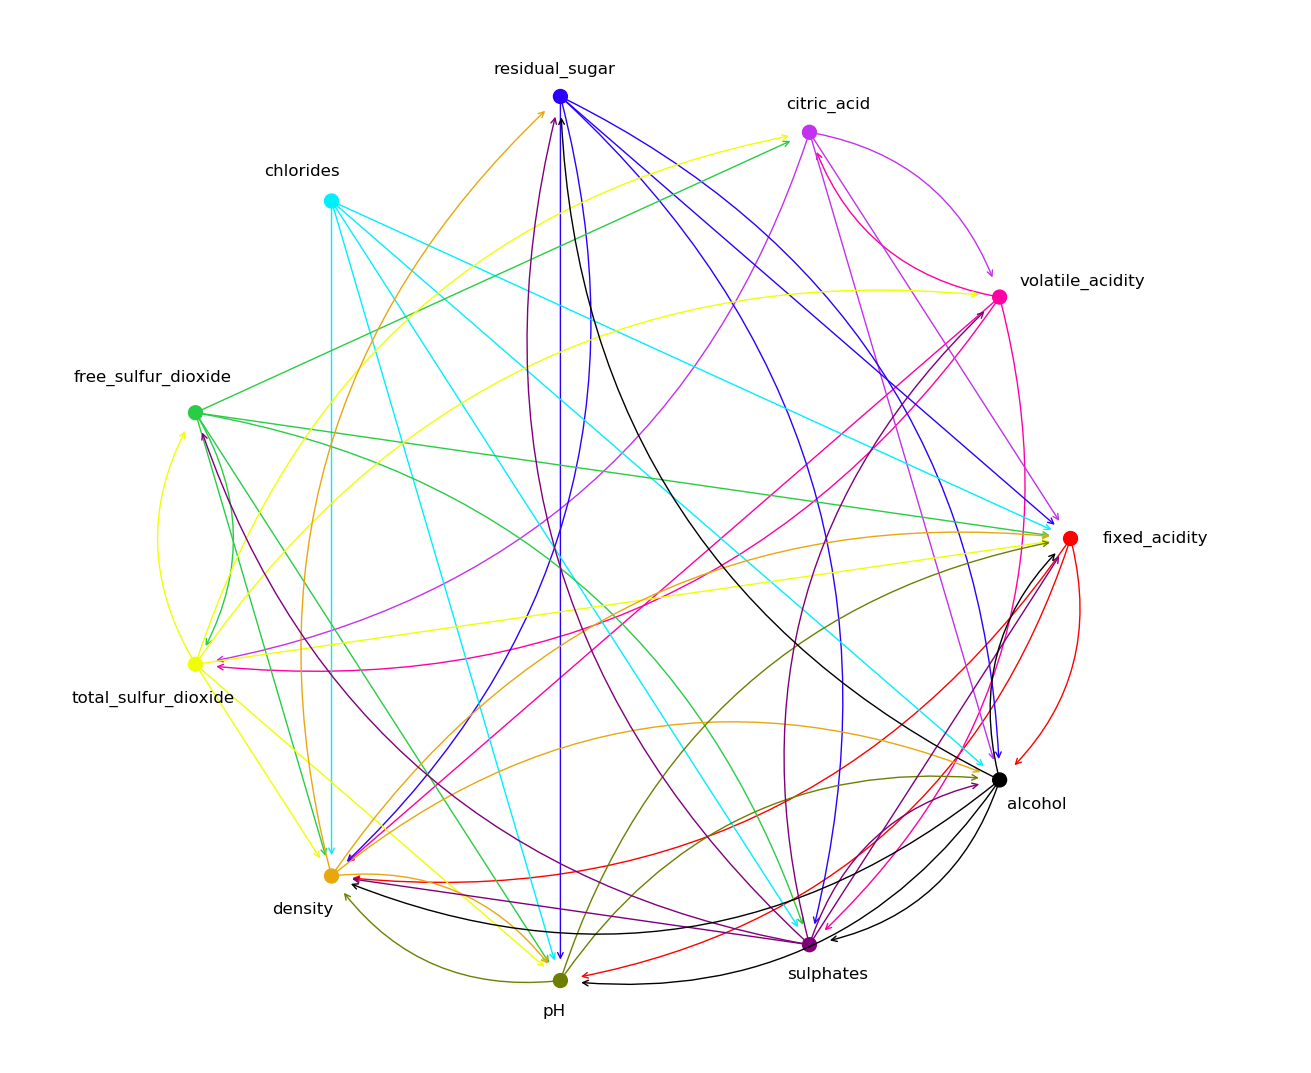